<a href="https://colab.research.google.com/github/Yathusnee/aquarium-demo/blob/main/exactfinalmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing libraries which willbe required
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


!pip install pyarrow
import pyarrow.parquet as pq

!pip install pandas-datareader
import pandas as pd
import pandas_datareader as pdr


In [2]:
pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.6 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [3]:
!pip install scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [18]:
import matplotlib.pyplot as plt


In [4]:
# Access Google Drive
from google.colab import drive
drive.mount('/content/drive')  # Add a newline here


Mounted at /content/drive


In [10]:
# Load the dataset from Google Drive
dataset_path = '/content/drive/MyDrive/RESEARCH DATA SET/dta.csv'
soil_data  = pd.read_csv(dataset_path)
df = pd.read_csv('/content/drive/MyDrive/RESEARCH DATA SET/dta.csv')


In [11]:
soil_data.head()#printing first 5 rows

,ID,pH,EC mS/cm,O.M. %,P ppm,K ppm,outcome
0,1,5.162,0.274,3.783414,18.608840,147.0,0
1,2,6.071,0.355,1.451688,32.742137,180.0,1
2,3,6.921,0.675,1.767599,19.024525,183.0,0
3,4,7.704,0.355,0.718322,6.276846,116.0,0
4,5,7.609,0.392,0.996625,6.553970,228.0,0


In [12]:
#check total row and column of data set
soil_data .shape

(924, 7)

In [13]:
#statictical measure of dataset
soil_data.describe()

,ID,pH,EC mS/cm,O.M. %,P ppm,K ppm,outcome
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.00000
mean,462.500000,6.995655,0.394219,2.005799,14.548160,269.341494,0.40368
std,266.880123,0.917185,0.313579,0.623459,15.409994,190.215996,0.49090
min,1.000000,4.490000,0.002000,0.370000,0.120000,31.000000,0.00000
25%,231.750000,6.340000,0.274750,1.560000,6.060000,142.000000,0.00000
50%,462.500000,7.395000,0.383000,1.930000,9.795000,221.000000,0.00000
75%,693.250000,7.730000,0.474000,2.360000,16.662500,335.000000,1.00000
max,924.000000,8.200000,5.621000,4.980000,152.420000,1665.000000,1.00000


In [14]:
# checking any values are missing from dataset
df.isnull().sum()

ID          0
pH          0
EC mS/cm    0
O.M. %      0
P ppm       0
K ppm       0
outcome     0
dtype: int64

when checking the missing values if the values are comes as 0 thwn there was no missing errors.

In [15]:
# View summary statistics in numerical variables with rounded values
summary_statistics = round(df.describe(), 2)
print(summary_statistics)


           ID      pH  EC mS/cm  O.M. %   P ppm   K ppm   outcome
count  924.00  924.00    924.00  924.00  924.00   924.00   924.00
mean   462.50    7.00      0.39    2.01   14.55   269.34     0.40
std    266.88    0.92      0.31    0.62   15.41   190.22     0.49
min      1.00    4.49      0.00    0.37    0.12    31.00     0.00
25%    231.75    6.34      0.27    1.56    6.06   142.00     0.00
50%    462.50    7.40      0.38    1.93    9.80   221.00     0.00
75%    693.25    7.73      0.47    2.36   16.66   335.00     1.00
max    924.00    8.20      5.62    4.98  152.42  1665.00     1.00


Text(0, 0.5, 'pH')

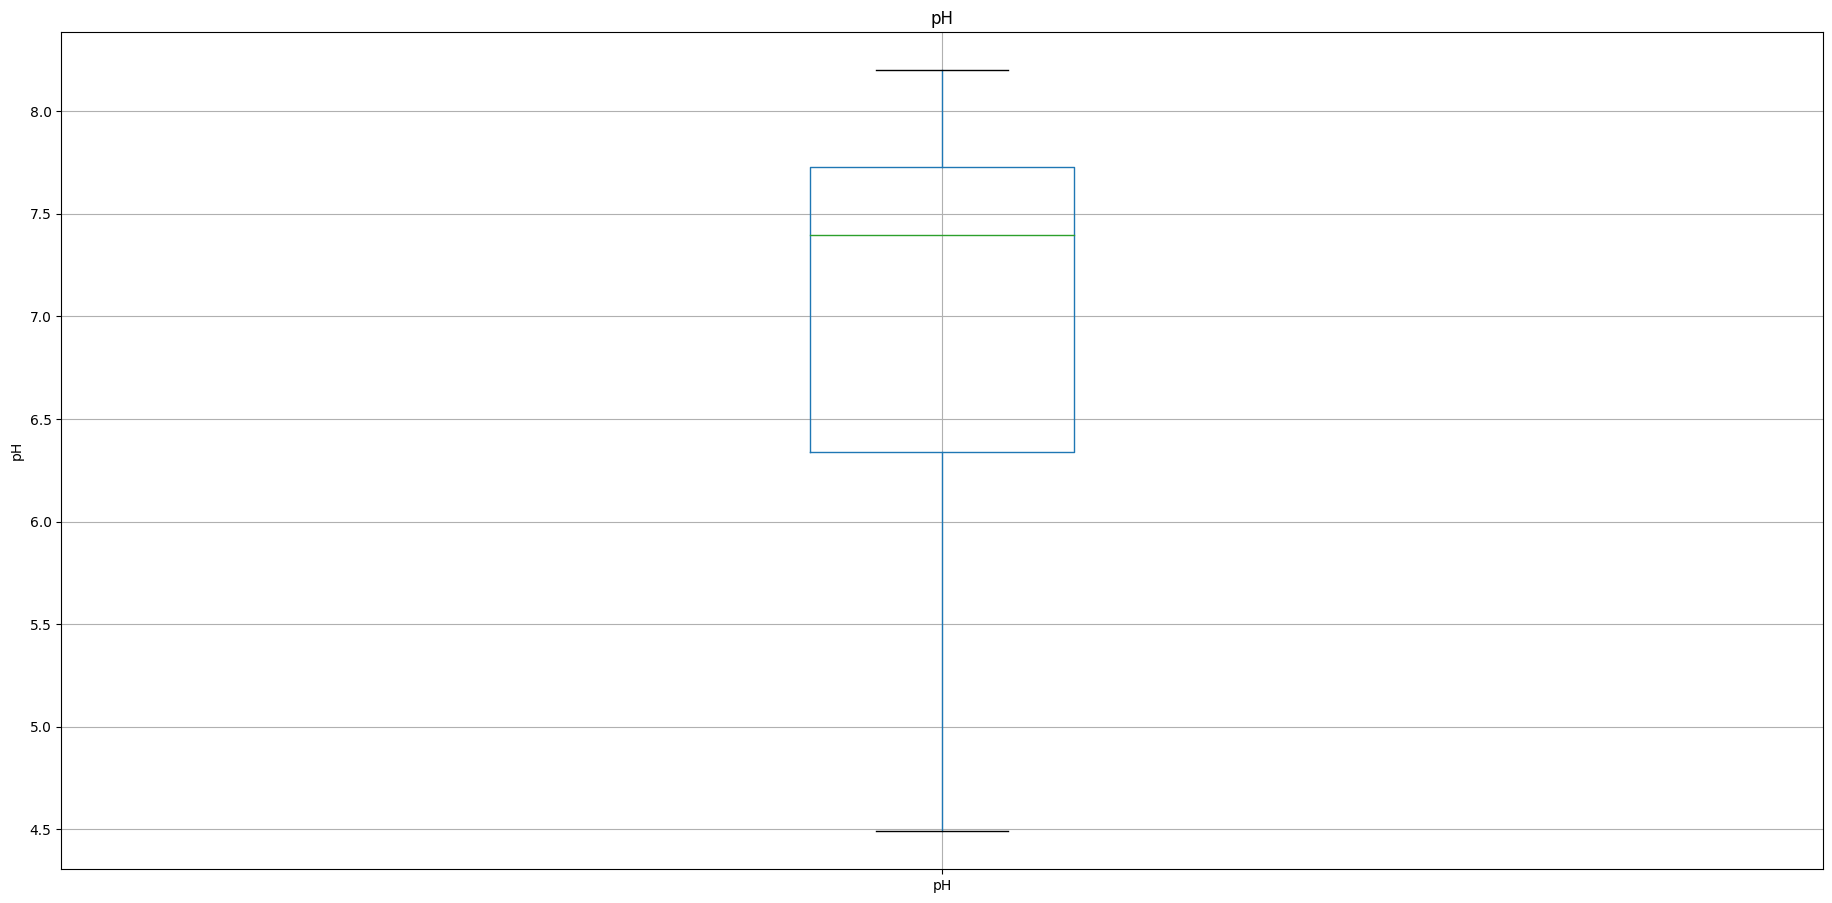

In [20]:
# Create a figure and axis object
plt.figure(figsize=(50,50))
# Draw boxplots for each column
plt.subplot(4, 2, 1)
df.boxplot(column='pH')
plt.title('pH')
plt.ylabel('pH')


In [27]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        924 non-null    int64  
 1   pH        924 non-null    float64
 2   EC mS/cm  924 non-null    float64
 3   O.M. %    924 non-null    float64
 4   P ppm     924 non-null    float64
 5   K ppm     924 non-null    float64
 6   outcome   924 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 50.7 KB


In [29]:
# Print out the column names to verify their correctness
print(df.columns)

Index(['ID', 'pH', 'EC mS/cm', 'O.M. %', 'P ppm', 'K ppm ', 'outcome'], dtype='object')


Text(0, 0.5, 'EC mS/cm')

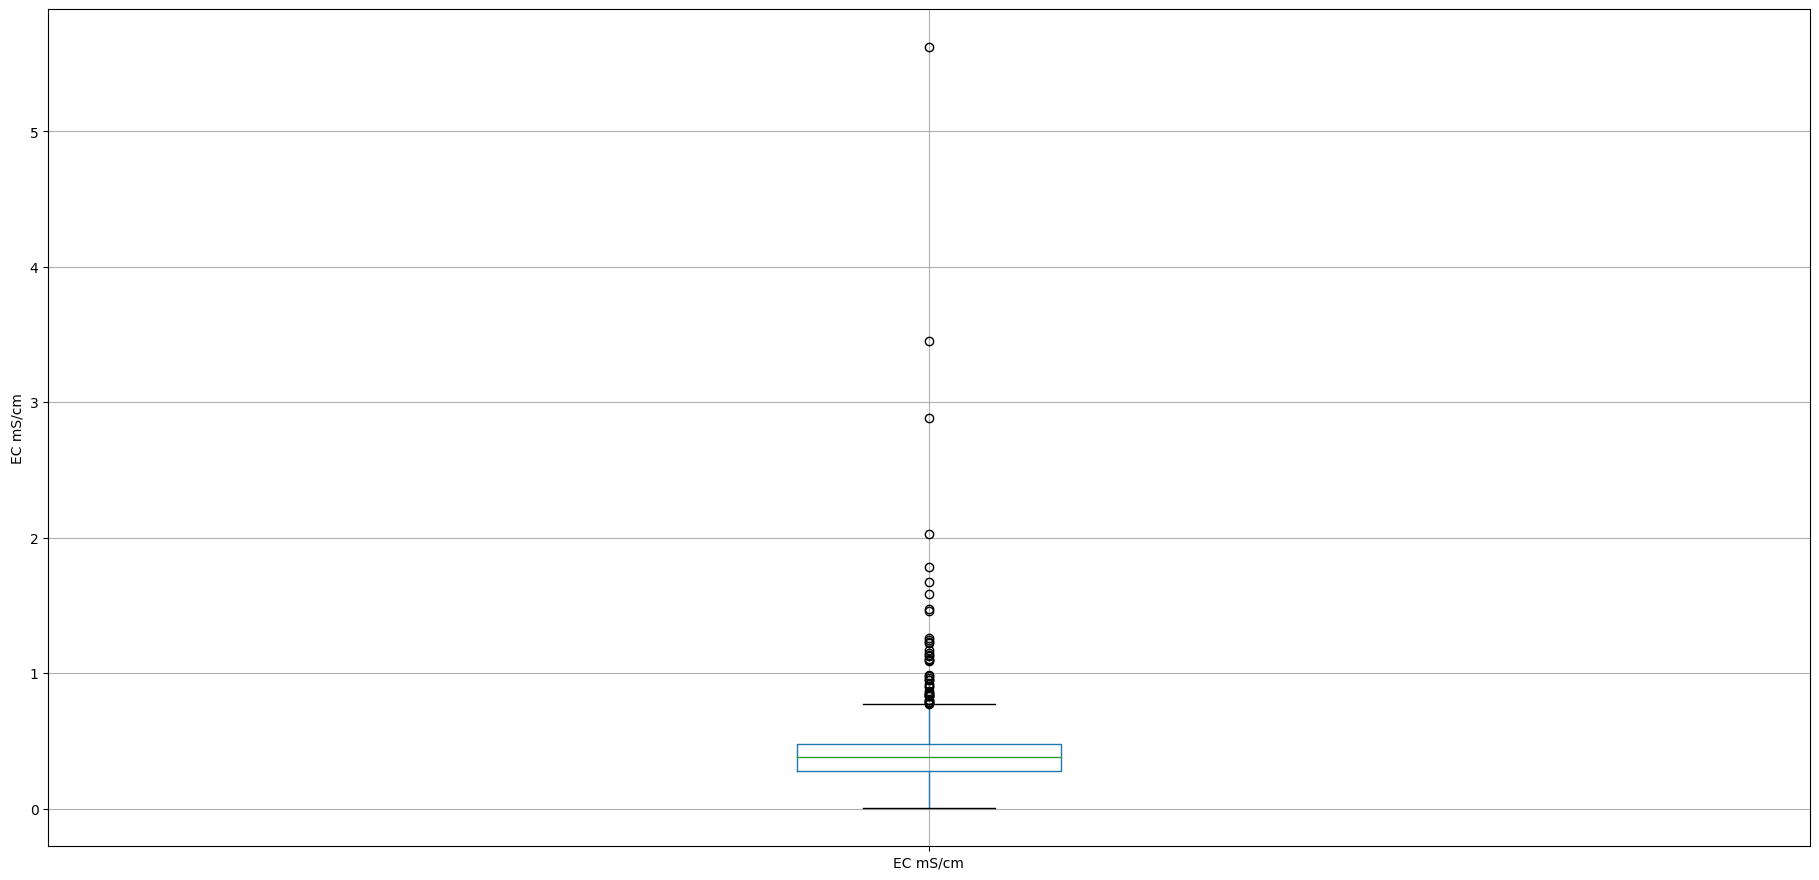

In [32]:
# Create a figure and axis object
plt.figure(figsize=(50,50))
plt.subplot(4, 2, 2)
df.boxplot(column='EC mS/cm')
plt.title('EC mS/cm')
plt.ylabel('EC mS/cm')

Text(0, 0.5, 'O.M. %')

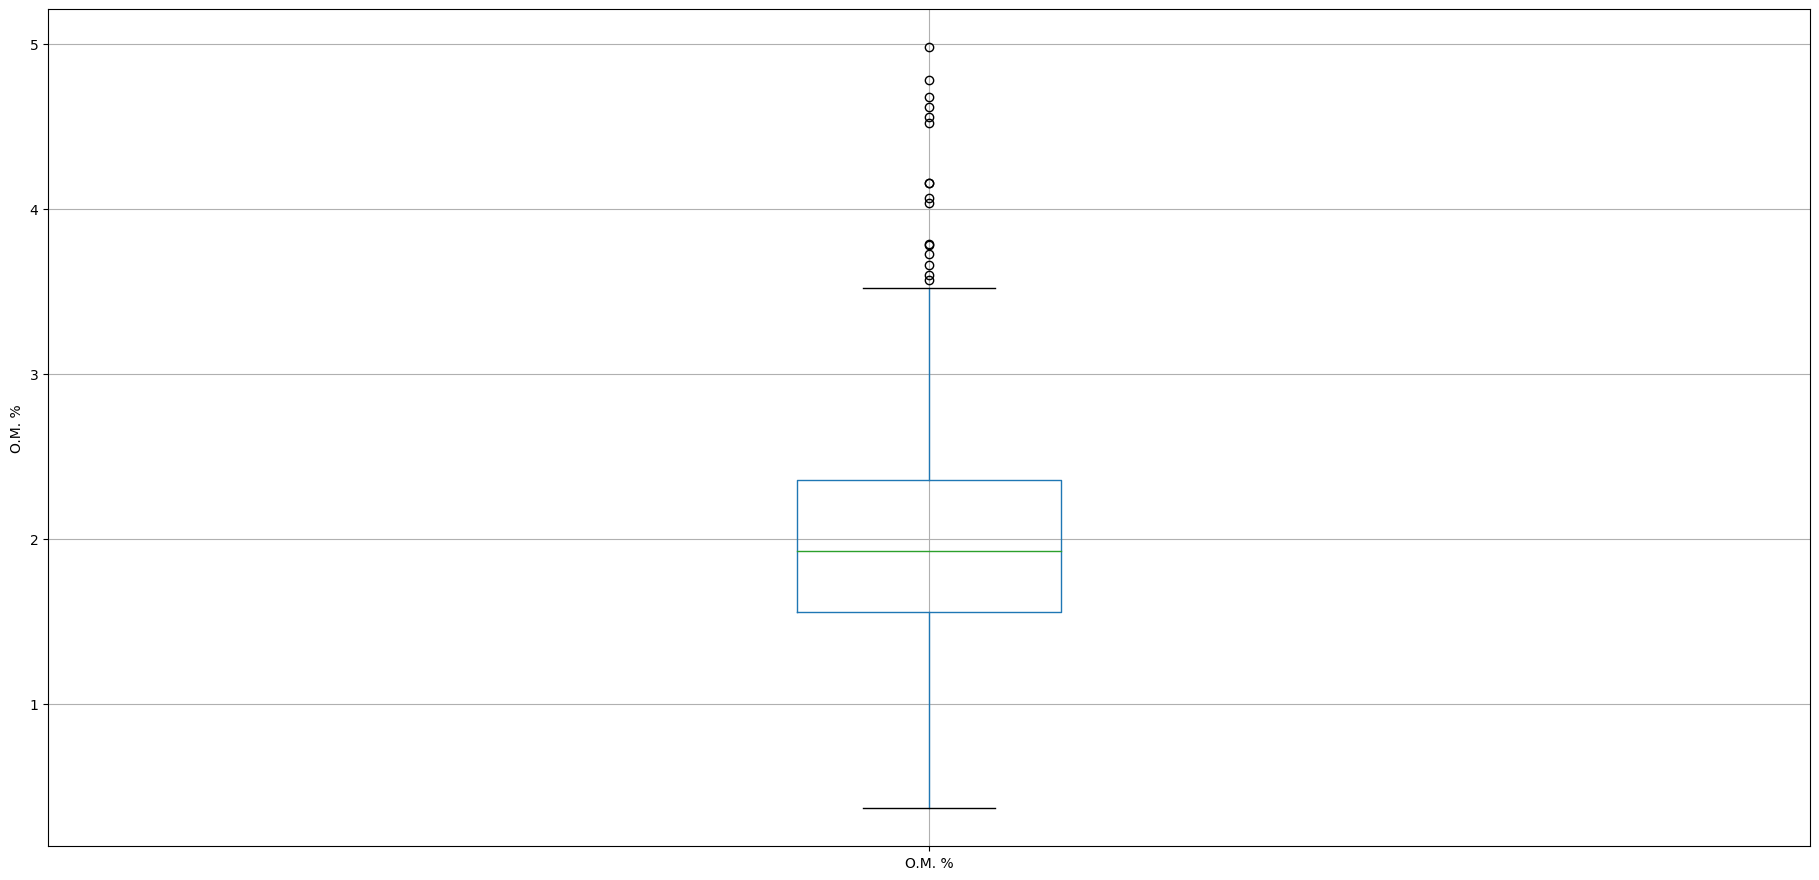

In [33]:
# Create a figure and axis object
plt.figure(figsize=(50,50))
plt.subplot(4, 2, 3)
df.boxplot(column='O.M. %')
plt.title('')
plt.ylabel('O.M. %')


Text(0, 0.5, 'P ppm')

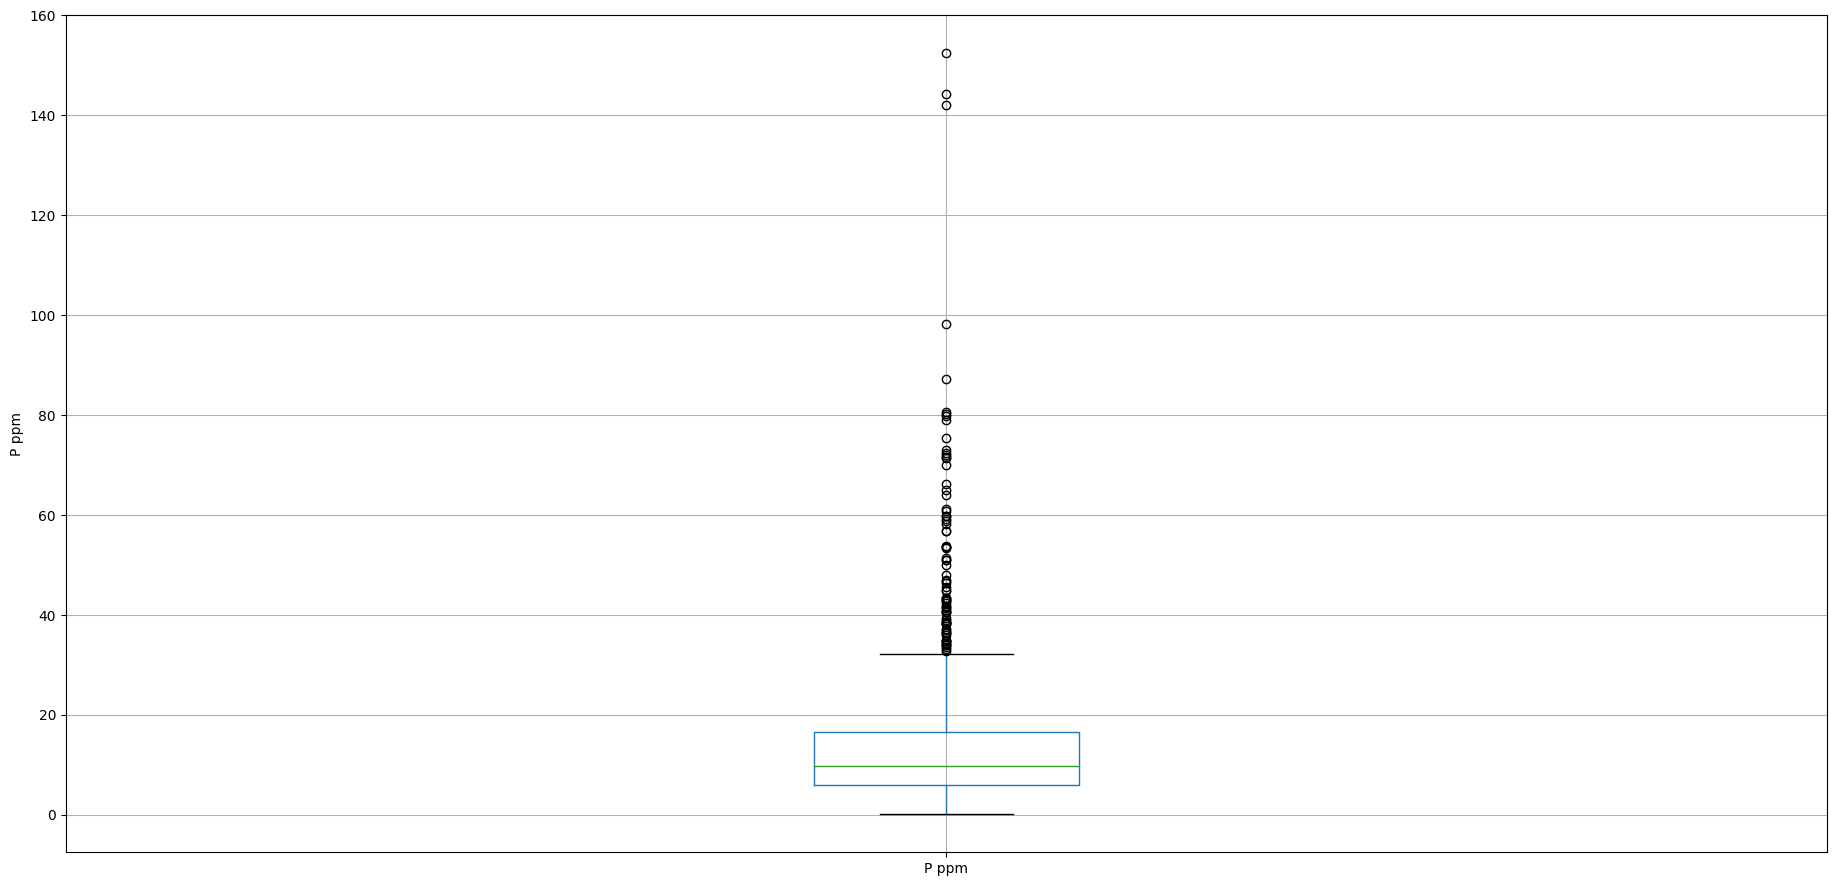

In [34]:
# Create a figure and axis object
plt.figure(figsize=(50,50))
plt.subplot(4, 2, 4)
df.boxplot(column='P ppm')
plt.title('')
plt.ylabel('P ppm')

Text(0, 0.5, 'K ppm ')

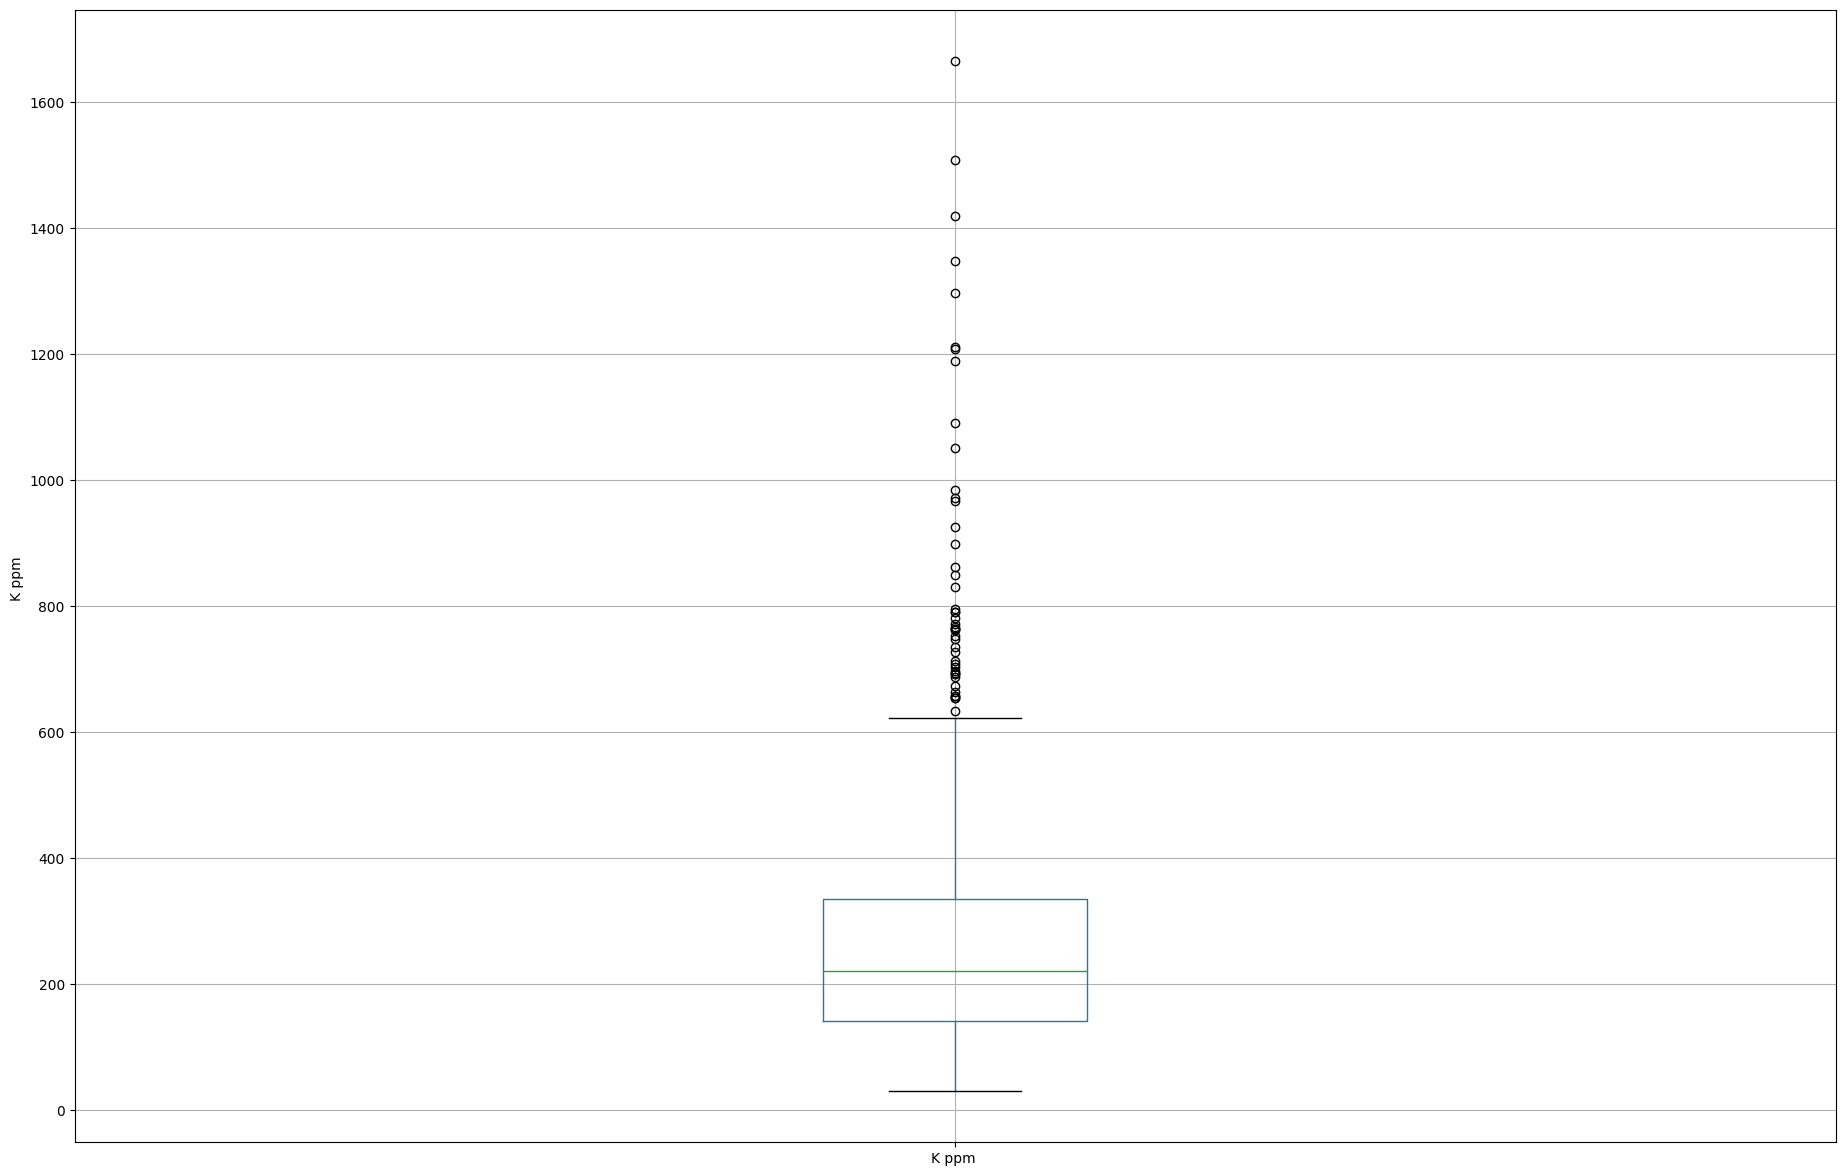

In [36]:
# Create a figure and axis object
plt.figure(figsize=(50,50))

# Add a subplot at position 5 (3rd row, 2nd column)
plt.subplot(3, 2, 5)

# Create a boxplot of the 'K ppm ' column
df.boxplot(column='K ppm ')

# Set the title and y-axis label
plt.title('')
plt.ylabel('K ppm ')

Testing and Training part start here, in the outcome field if the out come was 1 then it was suitable for paddy field if not then it was not suitable for paddy field

In [37]:
#statictical measure of dataset
soil_data.describe()

,ID,pH,EC mS/cm,O.M. %,P ppm,K ppm,outcome
count,924.000000,924.000000,924.000000,924.000000,924.000000,924.000000,924.00000
mean,462.500000,6.995655,0.394219,2.005799,14.548160,269.341494,0.40368
std,266.880123,0.917185,0.313579,0.623459,15.409994,190.215996,0.49090
min,1.000000,4.490000,0.002000,0.370000,0.120000,31.000000,0.00000
25%,231.750000,6.340000,0.274750,1.560000,6.060000,142.000000,0.00000
50%,462.500000,7.395000,0.383000,1.930000,9.795000,221.000000,0.00000
75%,693.250000,7.730000,0.474000,2.360000,16.662500,335.000000,1.00000
max,924.000000,8.200000,5.621000,4.980000,152.420000,1665.000000,1.00000


In [38]:
#check the outcome of dataset
soil_data['outcome'].value_counts()

outcome
0    551
1    373
Name: count, dtype: int64

here the target variable was out come, so the continuous variables appear to be:

pH EC mS/cm (Electrical Conductivity in millisiemens per centimeter) O.M. % (Organic Matter percentage) P ppm (Phosphorus in parts per million) K ppm (Potassium in parts per million) These variables can take on any value within a certain range.

discrete variables are those that have a limited number of distinct values or categories. In your dataset, the discrete variable is: outcome - It seems to represent the class labels and takes on only two values: 0 for non-rice paddy and 1 for rice paddy.

In [39]:
X = soil_data.drop(columns='outcome', axis=1)
Y = soil_data['outcome']

In [40]:
print(X)

      ID     pH  EC mS/cm    O.M. %      P ppm  K ppm 
0      1  5.162    0.2740  3.783414  18.608840   147.0
1      2  6.071    0.3550  1.451688  32.742137   180.0
2      3  6.921    0.6750  1.767599  19.024525   183.0
3      4  7.704    0.3550  0.718322   6.276846   116.0
4      5  7.609    0.3920  0.996625   6.553970   228.0
..   ...    ...       ...       ...        ...     ...
919  920  6.010    0.1097  2.470000   2.300000   111.2
920  921  6.670    0.0399  1.230000   5.940000   111.2
921  922  6.600    0.0397  1.160000  18.080000   111.2
922  923  6.120    0.0221  3.140000   3.640000   207.4
923  924  5.570    0.0677  2.180000   6.330000   103.4

[924 rows x 6 columns]


In [41]:
print(Y)

0      0
1      1
2      0
3      0
4      0
      ..
919    1
920    1
921    1
922    1
923    1
Name: outcome, Length: 924, dtype: int64


In [42]:
# Creation of instance
scaler = StandardScaler()

# Fitting of X data
scaler.fit(X)

# Transforming the data
standardized_data = scaler.transform(X)

#feeding the standartized data to the X variable
X = standardized_data

In [43]:
print(X)
print(Y)

[[-1.73017731 -2.00030237 -0.38358675  2.85276053  0.26365224 -0.64351975]
 [-1.72642828 -1.00868994 -0.1251384  -0.88925009  1.1813003  -0.4699388 ]
 [-1.72267925 -0.08143959  0.89589214 -0.38226843  0.29064187 -0.45415872]
 ...
 [ 1.72267925 -0.43161296 -1.13117255 -1.35735809  0.22931566 -0.83182877]
 [ 1.72642828 -0.95523669 -1.18732923  1.82019408 -0.70824604 -0.32581402]
 [ 1.73017731 -1.5552222  -1.04183238  0.27956273 -0.53358946 -0.87285699]]
0      0
1      1
2      0
3      0
4      0
      ..
919    1
920    1
921    1
922    1
923    1
Name: outcome, Length: 924, dtype: int64


In [44]:
# Splitting the dataset into primary and secondary data
primary_data = data.iloc[-200:]  # Last 200 data points
secondary_data = data.iloc[:-200]  # All data points except the last 200

In [45]:
# Splitting the secondary dataset
X_train_sec, X_test_sec, Y_train_sec, Y_test_sec = train_test_split(secondary_data.drop(columns=['outcome']),
                                                                    secondary_data['outcome'],
                                                                    test_size=0.2,
                                                                    stratify=secondary_data['outcome'],
                                                                    random_state=2)


In [46]:
# Combining primary and secondary data for training and testing
X_train = pd.concat([X_train_sec, primary_data.drop(columns=['outcome'])])
X_test = pd.concat([X_test_sec, primary_data.drop(columns=['outcome'])])
Y_train = pd.concat([Y_train_sec, primary_data['outcome']])
Y_test = pd.concat([Y_test_sec, primary_data['outcome']])

In [47]:
print(X.shape, X_test.shape, X_train.shape)

(924, 6) (345, 6) (779, 6)


# in this point start to create linear **model**

In [48]:
# Model creation
classifier = svm.SVC(kernel='linear')

In [49]:
#Model training using test data
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [50]:
# Accuracy score on train data
train_pred = classifier.predict(X_train)
accuracy = accuracy_score(train_pred, Y_train)

In [51]:
print("Accuracy score of train data = {}".format(accuracy))

Accuracy score of train data = 0.8048780487804879


In [52]:
accuracy_percentage = accuracy * 100
print("Accuracy score of train data = {:.2f}%".format(accuracy_percentage))


Accuracy score of train data = 80.49%


In [53]:
#Accuracy score on test data
test_pred = classifier.predict(X_test)
accuracy2 = accuracy_score(test_pred, Y_test)

In [54]:
print("Accuracy score on test data = {}".format(accuracy2))

Accuracy score on test data = 0.7217391304347827


In [56]:
accuracy2_percentage = accuracy2 * 100
print("Accuracy score of test data = {:.2f}%".format(accuracy2_percentage))


Accuracy score of test data = 72.17%


In [59]:
input_data = (1,6.2,0.45,2.1,25.6,180.3)

# Changing to numpy array
data_changed = np.asarray(input_data)

# Reshaping as predicting for one instance only
data_reshaped = data_changed.reshape(1, -1)

# Standardizing the input data
std_data = scaler.transform(data_reshaped)
print(std_data)

# Predicting output
prediction = classifier.predict(std_data)
if prediction[0] == 1:
    print('The soil was suitable for planting rice')
else:
    print('The soil was not suitable for planting rice')


[[-1.73017731 -0.86796606  0.17798004  0.15117678  0.71757494 -0.4683608 ]]
The soil was not suitable for planting rice


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [67]:
input_data = (2,7.5,0.408,1.93,4,207)

# Changing to numpy array
data_changed = np.asarray(input_data)

# Reshaping as predicting for one instance only
data_reshaped = data_changed.reshape(1, -1)

# Standardizing the input data
std_data = scaler.transform(data_reshaped)
print(std_data)

# Predicting output
# Predicting output
prediction = classifier.predict(std_data)

# Print prediction result
if prediction[0] == 1:
    print('The soil is not suitable for planting rice.')
else:
    print('The soil is suitable for planting rice.')


[[-1.72642828  0.55018153  0.04396979 -0.12164336 -0.68487193 -0.32791803]]
The soil is suitable for planting rice.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


# in this point start to create non linear **model**

In [68]:
# Model creation with non-linear kernel (RBF)
non_linear_classifier = SVC(kernel='rbf')

In [69]:
# Model training using training data
non_linear_classifier.fit(X_train, Y_train)

SVC()

In [70]:
# Accuracy score on train data
train_pred = non_linear_classifier.predict(X_train)
accuracy = accuracy_score(train_pred, Y_train)
accuracy_percentage = accuracy * 100
print("Accuracy score of train data = {:.2f}%".format(accuracy_percentage))

Accuracy score of train data = 75.99%


In [71]:
# Accuracy score on test data
test_pred = non_linear_classifier.predict(X_test)
accuracy2 = accuracy_score(test_pred, Y_test)
accuracy2_percentage = accuracy2 * 100
print("Accuracy score of test data = {:.2f}%".format(accuracy2_percentage))

Accuracy score of test data = 74.78%


In [73]:
# Prediction on new input data
input_data = (1, 6.2, 0.45, 2.1, 25.6, 180.3)

# Changing to numpy array
data_changed = np.asarray(input_data)

# Reshaping as predicting for one instance only
data_reshaped = data_changed.reshape(1, -1)

# Standardizing the input data
std_data = scaler.transform(data_reshaped)

# Predicting output
prediction = non_linear_classifier.predict(std_data)
if prediction[0] == 1:
    print('The soil is not suitable for planting rice.')
else:
    print('The soil is suitable for planting rice.')

The soil is suitable for planting rice.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
